In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [ ]:
DataDir = '/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b'
Categories = ['aluminium_foil', 'brown_bread', 'corduroy', 'cork', 'cotton', 'cracker', 'lettuce_leaf', 'linen', 'white_bread', 'wood','wool']
Samples = ['sample_a']
images = []
y = np.array([])

In [ ]:
for category in Categories:
  for Sample in Samples:
    path = os.path.join(DataDir,category)
    path = os.path.join(path,Sample)
    class_num = Categories.index(category)
    print(path)
    for imgname in os.listdir(path):
        img = cv.imread(os.path.join(path,imgname))
        img = cv.resize(img, (300, 300))
        images.append(img)
        y=np.append(y,[class_num])
      
        
  
x = np.array(images)
print(x.shape)

/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/aluminium_foil/sample_a
/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/brown_bread/sample_a
/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/corduroy/sample_a
/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/cork/sample_a
/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/cotton/sample_a
/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/cracker/sample_a
/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/lettuce_leaf/sample_a
/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/linen/sample_a
/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/white_bread/sample_a
/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/wood/sample_a
/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b/wool/sample_a
(1188, 300, 300, 3)


In [ ]:
y = np.reshape(y,(-1,1))
print(y.shape)
print(y)

(1188, 1)
[[ 0.]
 [ 0.]
 [ 0.]
 ...
 [10.]
 [10.]
 [10.]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(712, 300, 300, 3)
(238, 300, 300, 3)
(238, 300, 300, 3)


In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(712, 1)
(238, 1)
(238, 1)


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [ ]:
print(train_ds)
print(train_ds)
print(val_ds)

<TensorSliceDataset shapes: ((300, 300, 3), (1,)), types: (tf.uint8, tf.float64)>
<TensorSliceDataset shapes: ((300, 300, 3), (1,)), types: (tf.uint8, tf.float64)>
<TensorSliceDataset shapes: ((300, 300, 3), (1,)), types: (tf.uint8, tf.float64)>


In [ ]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
val_ds_size = tf.data.experimental.cardinality(val_ds).numpy()

print('Train size:', train_ds_size)
print('Test size:', test_ds_size)
print('Val size:', val_ds_size)

Train size: 712
Test size: 238
Val size: 238


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=11, activation="softmax"))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(11, activation='softmax')
])

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.003),
    metrics=['accuracy']    
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(224,224))
    
    return image,label

In [ ]:
train_ds = (train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=30,drop_remainder=True)
         )

test_ds = (test_ds
           .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=30,drop_remainder=True)
         )

val_ds = (val_ds
          .map(process_image)
          .shuffle(buffer_size=val_ds_size)
          .batch(batch_size=30,drop_remainder=True)
         )

In [ ]:
print(train_ds)
print(test_ds)
print(val_ds)

<BatchDataset shapes: ((30, 224, 224, 3), (30, 1)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((30, 224, 224, 3), (30, 1)), types: (tf.float32, tf.float64)>
<BatchDataset shapes: ((30, 224, 224, 3), (30, 1)), types: (tf.float32, tf.float64)>


In [ ]:
history = model.fit(train_ds,
          epochs=200,
          validation_data=val_ds,
          validation_freq=1)

Epoch 1/200
23/23 [==============================] - 80s 916ms/step - loss: 2.3981 - accuracy: 0.0906 - val_loss: 2.3974 - val_accuracy: 0.1714
Epoch 2/200
23/23 [==============================] - 21s 878ms/step - loss: 2.3978 - accuracy: 0.1087 - val_loss: 2.3972 - val_accuracy: 0.2286
Epoch 3/200
23/23 [==============================] - 21s 880ms/step - loss: 2.3974 - accuracy: 0.1255 - val_loss: 2.3968 - val_accuracy: 0.2571
Epoch 4/200
23/23 [==============================] - 21s 885ms/step - loss: 2.3971 - accuracy: 0.1374 - val_loss: 2.3965 - val_accuracy: 0.2143
Epoch 5/200
23/23 [==============================] - 21s 875ms/step - loss: 2.3962 - accuracy: 0.1370 - val_loss: 2.3964 - val_accuracy: 0.1714
Epoch 6/200
23/23 [==============================] - 21s 880ms/step - loss: 2.3962 - accuracy: 0.1181 - val_loss: 2.3959 - val_accuracy: 0.1619
Epoch 7/200
23/23 [==============================] - 21s 883ms/step - loss: 2.3954 - accuracy: 0.1447 - val_loss: 2.3958 - val_accuracy:

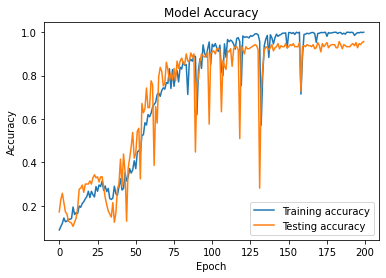

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
%matplotlib inline